In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
import splitfolders
import matplotlib.pyplot as plt

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'H:/Shortcuts/Research paper/flowerNET/flower/train'
valid_path = 'H:/Shortcuts/Research paper/flowerNET/flower/val'
test_path = 'H:/Shortcuts/Research paper/flowerNET/flower/test'

# useful for getting number of classes
folders = glob('H:/Shortcuts/Research paper/flowerNET/flower/train/*')
len(folders)

3

In [3]:
# add preprocessing layer to the front of VGG

VGG16 = VGG16(weights="imagenet", include_top=False, input_shape=IMAGE_SIZE + [3])
# don't train existing weights
for layer in VGG16.layers:
  layer.trainable = False


# our layers - you can add more if you want
x = Flatten()(VGG16.output)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG16.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=0,
                                   vertical_flip=False,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3037 images belonging to 3 classes.
Found 867 images belonging to 3 classes.


In [6]:
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/35
95/95 [==============================] - 1246s 13s/step - loss: 1.1180 - accuracy: 0.7613 - val_loss: 0.2957 - val_accuracy: 0.8720
Epoch 2/35
95/95 [==============================] - 1225s 13s/step - loss: 0.1685 - accuracy: 0.9361 - val_loss: 0.2595 - val_accuracy: 0.9089
Epoch 3/35
95/95 [==============================] - 1217s 13s/step - loss: 0.1223 - accuracy: 0.9542 - val_loss: 0.1836 - val_accuracy: 0.9377
Epoch 4/35
95/95 [==============================] - 1280s 13s/step - loss: 0.0746 - accuracy: 0.9710 - val_loss: 0.1704 - val_accuracy: 0.9343
Epoch 5/35
95/95 [==============================] - 1195s 13s/step - loss: 0.0963 - accuracy: 0.9674 - val_loss: 0.1887 - val_accuracy: 0.9343
Epoch 6/35
95/95 [==============================] - 1580s 17s/step - loss: 0.0501 - accuracy: 0.9802 - val_loss: 0.2375 - val_accuracy: 0.9216
Epoch 7/35
95/95 [==============================] - 1264s 13s/step - loss: 0.0499 - accuracy: 0.9809 - val_loss: 0.1644 - val_accuracy: 0.9539

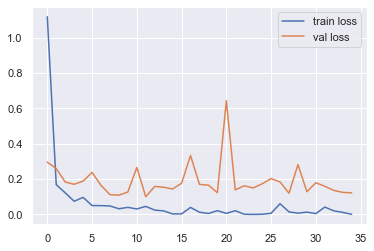

In [9]:
# ploting val loss and traing loss
sns.set_theme()
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/LossVal_loss_VGG16.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/LossVal_loss_VGG16')
plt.show()

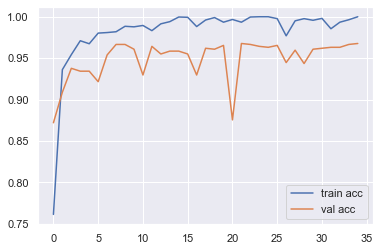

In [10]:
#plotting val acc and training acc
sns.set_theme()
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/accuracy_VGG16.svg')
plt.savefig('H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/accuracy_VGG16')
plt.show()

In [12]:
model.save('H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/VGG16.h5')

In [4]:
from keras.models import load_model
model = load_model('H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/VGG16.h5')

In [11]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
val_loss, val_acc = model.evaluate(val_set, steps=16)
print("Traning Loss and traing accurcy: ",train_loss, train_acc )
print("Validation Loss and Validation accurcy: ",val_loss, val_acc )

16/16 [==============================] - 227s 14s/step - loss: 0.1166 - accuracy: 0.9688
Traning Loss and traing accurcy:  0.0006212438456714153 1.0
Validation Loss and Validation accurcy:  0.11657614260911942 0.96875


In [5]:
testing_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=False,
    image_size=(224,224),
    batch_size=32
)

Found 438 files belonging to 3 classes.


In [6]:
class_names = testing_set.class_names
class_names

['Black Spot', 'Downy mildew', 'Fresh Leaf']

In [7]:
# Extracting all test image and corrosponding labels from tesing image
test_label=[]
test_img=[]
for img, label in testing_set:
  #print(label.numpy())
    test_label.append(label.numpy())
    test_img.append(img.numpy())
print("Total batch of test label: ",len(test_label))
print("Total batch of test image: ",len(test_img))

###############################################################################################

# Extracting only all test image  from tesing image batch list
actual_img=[]
for i in range(len(test_img)):
    for i in test_img[i]:
        i = i*(1/255) # we have to rescale the test image as well to feed the model
        actual_img.append(i)

print("Total Number of image: ", len(actual_img))


# Extracting only all test image  labels from tesing image batch list
actual_label=[]
for i in range(len(test_label)):
    for i in test_label[i]:
        actual_label.append(class_names[i])
     
    

print("Total number of image label : ",len(actual_label))

Total batch of test label:  14
Total batch of test image:  14
Total Number of image:  438
Total number of image label :  438


Black Spot


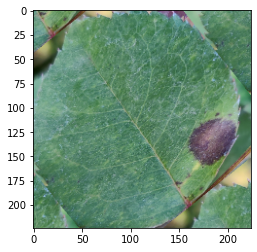

In [8]:
print(actual_label[27])
plt.imshow(actual_img[27])

In [11]:
import time
from datetime import timedelta
start = time.time()

# make prediction using loaded model
predicted_label=[]
for img in actual_img:
    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array)
    label= class_names[np.argmax(predictions)]
    predicted_label.append(label)

end = time.time()
print(timedelta(seconds=end-start))

len(predicted_label)

0:03:03.016898


438

In [19]:
# Printing all evaluation matrix
print("Test accuracy: ",accuracy_score(actual_label, predicted_label))
print(classification_report(actual_label, predicted_label))

Test accuracy:  0.9611872146118722
              precision    recall  f1-score   support

  Black Spot       0.94      0.97      0.95       145
Downy mildew       0.99      0.98      0.98       149
  Fresh Leaf       0.96      0.94      0.95       144

    accuracy                           0.96       438
   macro avg       0.96      0.96      0.96       438
weighted avg       0.96      0.96      0.96       438



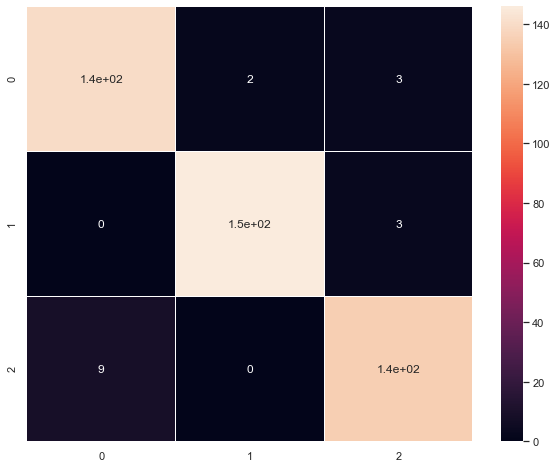

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(actual_label, predicted_label)
import seaborn as sns
ax= plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, linewidth=.5)
plt.plot()
plt.savefig("H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/confussion_matrix_VGG16.svg")
plt.savefig("H:/Shortcuts/Research paper/flowerNET/35-epoch/VGG16/confussion_matrix_VGG16")
plt.show()